In [1]:
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd

csv_file_path = '/mnt/c/Users/preet/Desktop/Projects/Movie Recommendation/Movie Recommendation/Best Movie by Year Netflix.csv'
df = pd.read_csv(csv_file_path)

In [3]:
print(df)

    index                                           TITLE  RELEASE_YEAR  \
0       0                                 White Christmas          1954   
1       1                            The Guns of Navarone          1961   
2       2                                    My Fair Lady          1964   
3       3                                Bonnie and Clyde          1967   
4       4                                     Dirty Harry          1971   
5       5                                    The Exorcist          1973   
6       6                 Monty Python and the Holy Grail          1975   
7       7                                     Taxi Driver          1976   
8       8                                   Life of Brian          1979   
9       9                                 The Blue Lagoon          1980   
10     10                                           Annie          1982   
11     11                                       Christine          1983   
12     12                

In [4]:
df = df[["TITLE","MAIN_GENRE","RELEASE_YEAR","MAIN_PRODUCTION","SCORE"]]

In [5]:
df.head()

,TITLE,MAIN_GENRE,RELEASE_YEAR,MAIN_PRODUCTION,SCORE
0,White Christmas,romance,1954,US,7.5
1,The Guns of Navarone,war,1961,US,7.5
2,My Fair Lady,drama,1964,US,7.8
3,Bonnie and Clyde,drama,1967,US,7.7
4,Dirty Harry,thriller,1971,US,7.7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TITLE            49 non-null     object 
 1   MAIN_GENRE       49 non-null     object 
 2   RELEASE_YEAR     49 non-null     int64  
 3   MAIN_PRODUCTION  49 non-null     object 
 4   SCORE            49 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.0+ KB


In [7]:
df.isnull().sum()

TITLE              0
MAIN_GENRE         0
RELEASE_YEAR       0
MAIN_PRODUCTION    0
SCORE              0
dtype: int64

In [8]:
df.groupby(['TITLE'])['SCORE'].max().nlargest(10)

TITLE
David Attenborough: A Life on Our Planet    9.0
Forrest Gump                                8.8
Inception                                   8.8
Bo Burnham: Inside                          8.7
Saving Private Ryan                         8.6
3 Idiots                                    8.4
Dangal                                      8.4
Dave Chappelle: Sticks & Stones             8.4
Django Unchained                            8.4
Full Metal Jacket                           8.3
Name: SCORE, dtype: float64

In [9]:
df.groupby(['TITLE'])['SCORE'].min().nlargest(10).reset_index().sort_values('SCORE', ascending=True)

,TITLE,SCORE
9,Full Metal Jacket,8.3
5,3 Idiots,8.4
6,Dangal,8.4
7,Dave Chappelle: Sticks & Stones,8.4
8,Django Unchained,8.4
4,Saving Private Ryan,8.6
3,Bo Burnham: Inside,8.7
1,Forrest Gump,8.8
2,Inception,8.8
0,David Attenborough: A Life on Our Planet,9.0


In [10]:
df.groupby(['MAIN_GENRE'])['SCORE'].max().nlargest(10)

MAIN_GENRE
documentary    9.0
drama          8.8
scifi          8.8
comedy         8.7
action         8.4
western        8.4
crime          8.3
fantasy        8.2
thriller       8.2
horror         8.1
Name: SCORE, dtype: float64

In [11]:
df.groupby(['MAIN_GENRE'])['SCORE'].min().nlargest(10).reset_index().sort_values('SCORE', ascending=True)

,MAIN_GENRE,SCORE
9,horror,6.7
8,comedy,6.9
7,thriller,7.1
6,crime,7.2
5,war,7.5
4,scifi,8.0
3,fantasy,8.2
1,action,8.4
2,western,8.4
0,documentary,9.0


In [12]:
df.groupby(['RELEASE_YEAR'])['SCORE'].max().nlargest(10)

RELEASE_YEAR
2020    9.0
1994    8.8
2010    8.8
2021    8.7
1998    8.6
2009    8.4
2012    8.4
2016    8.4
2019    8.4
1976    8.3
Name: SCORE, dtype: float64

In [13]:
df.groupby(['RELEASE_YEAR'])['SCORE'].min().nlargest(10).reset_index().sort_values('SCORE', ascending=True)

,RELEASE_YEAR,SCORE
9,1976,8.3
5,2009,8.4
6,2012,8.4
7,2016,8.4
8,2019,8.4
4,1998,8.6
3,2021,8.7
1,1994,8.8
2,2010,8.8
0,2020,9.0


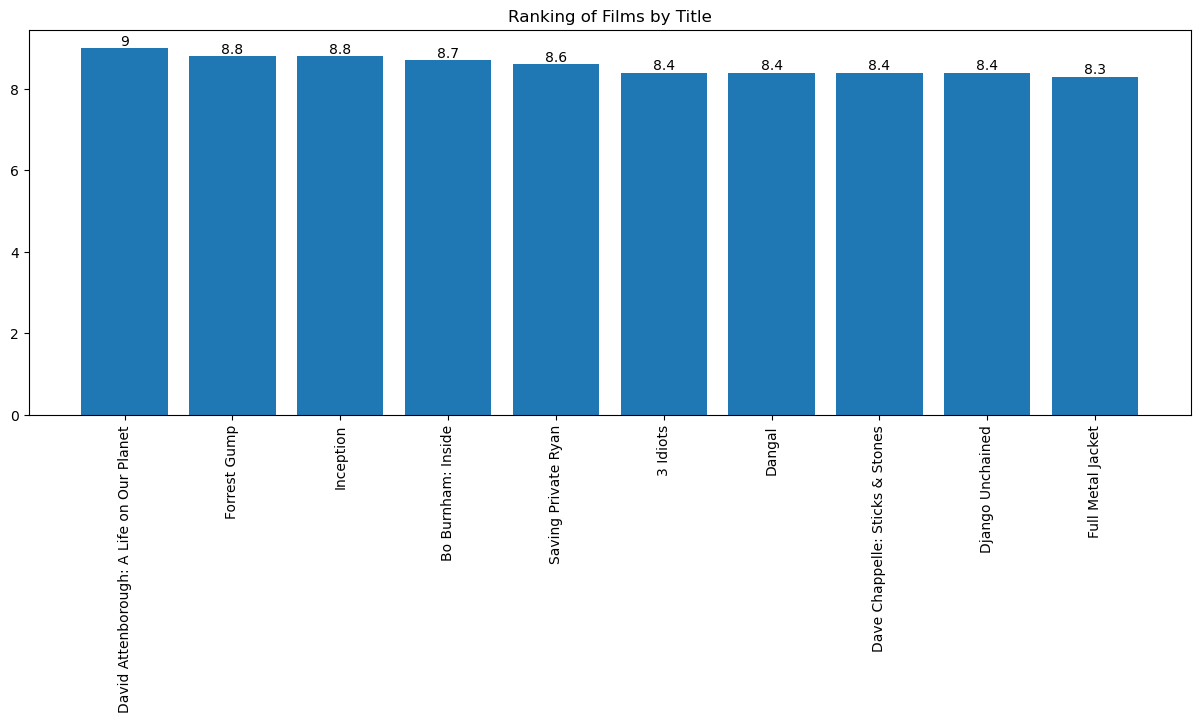

In [14]:
graf_dados = df.groupby(['TITLE'])['SCORE'].max().nlargest(10)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
graf_dados=plt.bar(graf_dados.index, graf_dados.values)
plt.title('Ranking of Films by Title')
plt.bar_label(graf_dados)
plt.xticks(rotation=90)
plt.show()

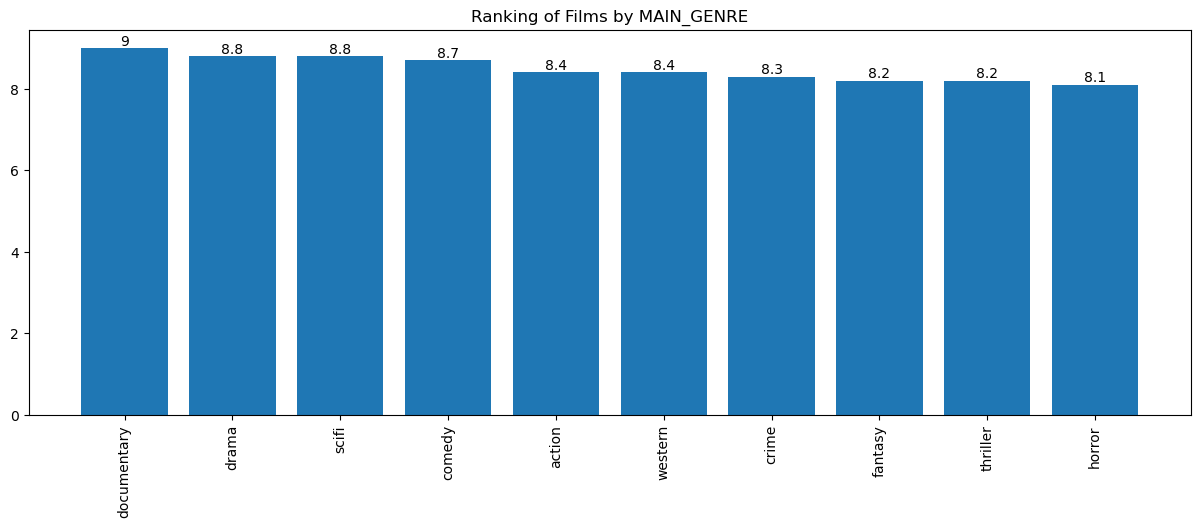

In [15]:
graf_dados = df.groupby(['MAIN_GENRE'])['SCORE'].max().nlargest(10)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
graf_dados=plt.bar(graf_dados.index, graf_dados.values)
plt.title('Ranking of Films by MAIN_GENRE')
plt.bar_label(graf_dados)
plt.xticks(rotation=90)
plt.show()

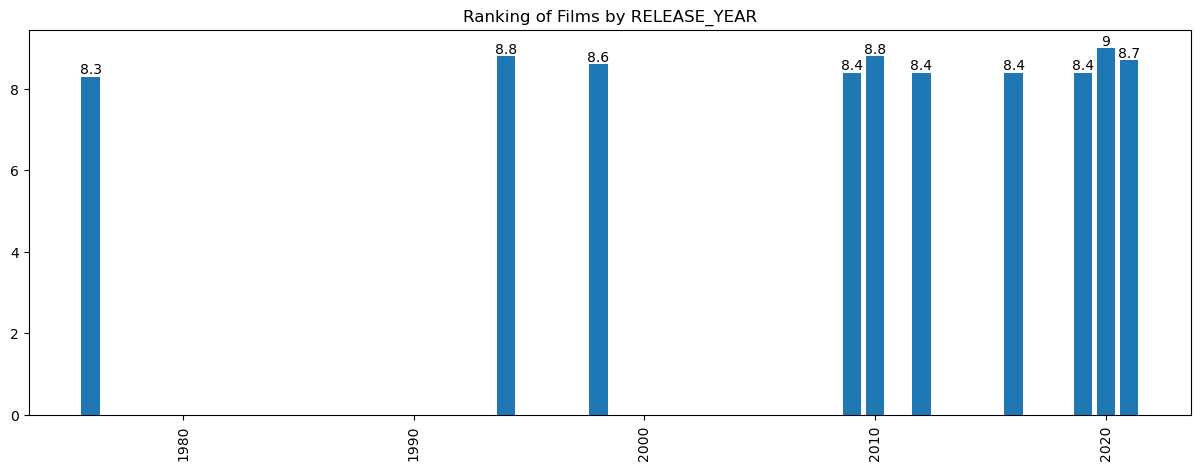

In [16]:
graf_dados = df.groupby(['RELEASE_YEAR'])['SCORE'].max().nlargest(10)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
graf_dados=plt.bar(graf_dados.index, graf_dados.values)
plt.title('Ranking of Films by RELEASE_YEAR')
plt.bar_label(graf_dados)
plt.xticks(rotation=90)
plt.show()

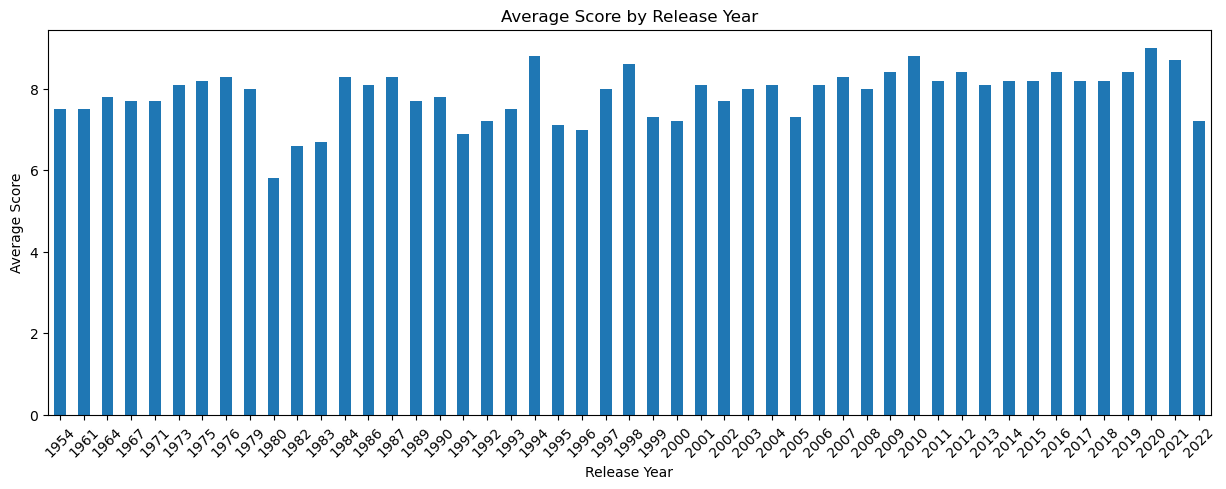

In [17]:
average_scores_by_year = df.groupby('RELEASE_YEAR')['SCORE'].mean()
plt.figure(figsize=(15, 5))
average_scores_by_year.plot(kind='bar')
plt.title('Average Score by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()


In [18]:
desired_genre = "Action"  # Replace with user input
desired_year = 2022  # Replace with user input

filtered_movies = df[(df['MAIN_GENRE'] == desired_genre) & (df['RELEASE_YEAR'] == desired_year)]
top_rated_filtered = filtered_movies.nlargest(10, 'SCORE')

print(f"Top Rated {desired_genre} Movies of {desired_year}:")
print(top_rated_filtered[['TITLE', 'MAIN_GENRE', 'RELEASE_YEAR', 'SCORE']])

Top Rated Action Movies of 2022:
Empty DataFrame
Columns: [TITLE, MAIN_GENRE, RELEASE_YEAR, SCORE]
Index: []


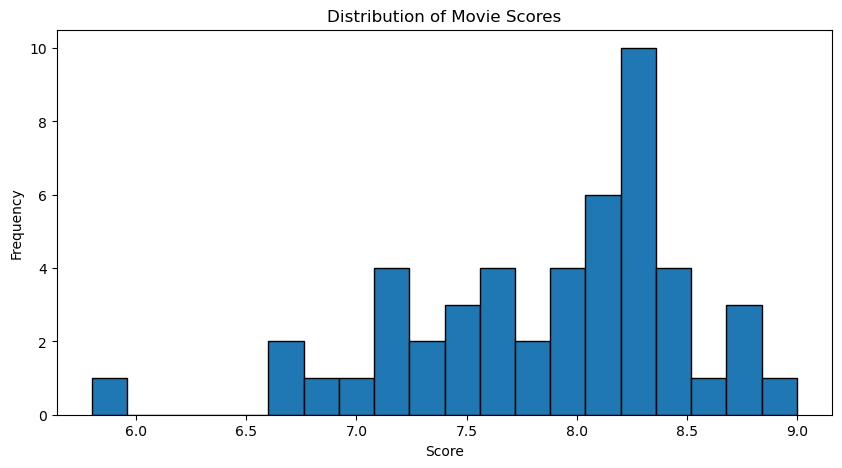

In [19]:
plt.figure(figsize=(10, 5))
plt.hist(df['SCORE'], bins=20, edgecolor='black')
plt.title('Distribution of Movie Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# Prepare features and target
X = df[['MAIN_GENRE', 'RELEASE_YEAR', 'MAIN_PRODUCTION']]
y = df['SCORE']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of train and test sets
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (39, 3)
Test set shape: (10, 3)


In [22]:
from surprise import accuracy

In [23]:
from surprise import Reader, Dataset, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

# Drop duplicates and missing values
df.drop_duplicates(subset=['TITLE'], inplace=True)
df.dropna(subset=['SCORE'], inplace=True)

# Load data into Surprise's Dataset
reader = Reader(rating_scale=(1, 10))  # Assuming your scores are between 1 and 10
data = Dataset.load_from_df(df[['MAIN_GENRE', 'RELEASE_YEAR', 'SCORE']], reader)

# Build a train-test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Build a user-based collaborative filtering model using Surprise's KNNBasic
sim_options = {'name': 'cosine', 'user_based': True}  # You can experiment with different similarity measures
model = KNNBasic(sim_options=sim_options)
model.fit(trainset)

# Make predictions on the test set
predictions = model.test(testset)

# Calculate RMSE (Root Mean Squared Error) to evaluate the model
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse:.2f}')


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7165
RMSE: 0.72


In [25]:
existing_movie_titles = df['TITLE'].unique()
print(existing_movie_titles)


['White Christmas' 'The Guns of Navarone' 'My Fair Lady'
 'Bonnie and Clyde' 'Dirty Harry' 'The Exorcist'
 'Monty Python and the Holy Grail' 'Taxi Driver' 'Life of Brian'
 'The Blue Lagoon' 'Annie' 'Christine' 'Once Upon a Time in America'
 'Stand by Me' 'Full Metal Jacket' 'When Harry Met Sally...' 'Awakenings'
 'My Girl' 'A River Runs Through It' 'Menace II Society' 'Forrest Gump'
 'Desperado' 'Happy Gilmore'
 'Neon Genesis Evangelion: The End of Evangelion' 'Saving Private Ryan'
 'Girl, Interrupted' 'The Patriot' 'Lagaan: Once Upon a Time in India'
 'Road to Perdition' 'Big Fish' 'Swades' 'Memoirs of a Geisha'
 'Rang De Basanti' 'Like Stars on Earth' 'Ip Man' '3 Idiots' 'Inception'
 'Warrior' 'Django Unchained' 'Rush' 'Queen' 'Drishyam' 'Dangal'
 'Bāhubali 2: The Conclusion' 'Andhadhun'
 'Dave Chappelle: Sticks & Stones'
 'David Attenborough: A Life on Our Planet' 'Bo Burnham: Inside'
 'The Tinder Swindler']


In [26]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Get the indices of movie titles
indices = pd.Series(df.index, index=df['TITLE']).drop_duplicates()

def hybrid_recommendation(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Exclude the movie itself
    movie_indices = [i[0] for i in sim_scores]
    
    movies = df['TITLE'].iloc[movie_indices]
    scores = df['SCORE'].iloc[movie_indices]
    genres = df['MAIN_GENRE'].iloc[movie_indices]
    
    recommended_movies = pd.DataFrame({
        'Movie Title': movies,
        'Score': scores,
        'Genre': genres
    })
    return recommended_movies

# Get recommendations for the movie title "Queen"
movie_title = 'Queen'
recommendations = hybrid_recommendation(movie_title)

print(f"Hybrid Recommendations based on {movie_title}:")
print(recommendations)


Hybrid Recommendations based on Queen:
                    Movie Title  Score  Genre
3              Bonnie and Clyde    7.7  drama
10                        Annie    6.6  drama
12  Once Upon a Time in America    8.3  drama
13                  Stand by Me    8.1  drama
14            Full Metal Jacket    8.3  drama
16                   Awakenings    7.8  drama
18      A River Runs Through It    7.2  drama
19            Menace II Society    7.5  drama
20                 Forrest Gump    8.8  drama
24          Saving Private Ryan    8.6  drama


In [27]:
from surprise import SVD
from surprise.model_selection import cross_validate

# Define a Reader and load data
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['USER_ID', 'TITLE', 'SCORE']], reader)

# Try out different algorithms and settings
# Collaborative Filtering - SVD
algorithm = SVD()

# Evaluate using cross-validation
results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=True)

# Print the average RMSE across folds
print("Average RMSE:", sum(results['test_rmse']) / len(results['test_rmse']))


Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.4498  0.5245  0.5853  0.6433  0.8854  0.6177  0.1485  
Fit time          0.51    0.00    0.00    0.00    0.00    0.10    0.21    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Average RMSE: 0.6176569086187038


In [28]:
from surprise import SVD

# Define a Reader and load data
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['USER_ID', 'TITLE', 'SCORE']], reader)

# Build a train-test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Initialize the SVD algorithm
svd = SVD(n_factors=100, n_epochs=20, lr_all=0.005, reg_all=0.02)

# Train the model
svd.fit(trainset)

# Make predictions on the test set
predictions = svd.test(testset)

# Evaluate using RMSE
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse:.2f}')


RMSE: 0.7153
RMSE: 0.72


In [29]:
print("Movie Recommendation Engine Successfully Built and Implemented!")

Movie Recommendation Engine Successfully Built and Implemented!
